In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cleandata.csv')

In [3]:
print(df.head())
print(df.shape)

   school  sex  age  address  famsize  Pstatus  Medu  Fedu  traveltime  \
0       0    1   18        0        1        0     4     4           2   
1       0    1   17        0        1        1     1     1           1   
2       0    1   15        0        0        1     1     1           1   
3       0    1   15        0        1        1     4     2           1   
4       0    1   16        0        1        1     3     3           1   

   studytime   ...     romantic  famrel  freetime  goout  health  absences  \
0          2   ...            0       4         3      4       3         6   
1          2   ...            0       5         3      3       3         4   
2          2   ...            0       4         3      2       3        10   
3          3   ...            1       3         2      2       5         2   
4          2   ...            0       4         3      2       5         4   

   G1  G2  G3  drinker  
0   5   6   6        0  
1   5   5   6        0  
2   7   8  

In [4]:
X = df.iloc[:,0:-1]
print(X.head())
y = df['drinker']
print(y.head())

   school  sex  age  address  famsize  Pstatus  Medu  Fedu  traveltime  \
0       0    1   18        0        1        0     4     4           2   
1       0    1   17        0        1        1     1     1           1   
2       0    1   15        0        0        1     1     1           1   
3       0    1   15        0        1        1     4     2           1   
4       0    1   16        0        1        1     3     3           1   

   studytime ...  internet  romantic  famrel  freetime  goout  health  \
0          2 ...         0         0       4         3      4       3   
1          2 ...         1         0       5         3      3       3   
2          2 ...         1         0       4         3      2       3   
3          3 ...         1         1       3         2      2       5   
4          2 ...         0         0       4         3      2       5   

   absences  G1  G2  G3  
0         6   5   6   6  
1         4   5   5   6  
2        10   7   8  10  
3         2 

In [5]:
from sklearn.model_selection import cross_val_score

In [6]:
from sklearn import neighbors

for i in range(1,11):
    clf = neighbors.KNeighborsClassifier(n_neighbors = i)

    scores_knn = cross_val_score(clf, X, y, cv =10)
    
    print('Cross Validations Score for KNN with n = %i, \n%s\nmean: %1.4f standard deviation: %1.4f\n' 
          % (i, str(scores_knn), np.mean(scores_knn), np.std(scores_knn)))

Cross Validations Score for KNN with n = 1, 
[ 0.55        0.525       0.525       0.525       0.425       0.6
  0.66666667  0.51282051  0.53846154  0.60526316]
mean: 0.5473 standard deviation: 0.0617

Cross Validations Score for KNN with n = 2, 
[ 0.55        0.45        0.55        0.6         0.475       0.625
  0.61538462  0.56410256  0.58974359  0.65789474]
mean: 0.5677 standard deviation: 0.0619

Cross Validations Score for KNN with n = 3, 
[ 0.45        0.475       0.575       0.525       0.55        0.525
  0.69230769  0.53846154  0.51282051  0.60526316]
mean: 0.5449 standard deviation: 0.0649

Cross Validations Score for KNN with n = 4, 
[ 0.65        0.525       0.6         0.625       0.575       0.575
  0.58974359  0.53846154  0.56410256  0.60526316]
mean: 0.5848 standard deviation: 0.0359

Cross Validations Score for KNN with n = 5, 
[ 0.575       0.55        0.55        0.55        0.6         0.5
  0.66666667  0.43589744  0.48717949  0.65789474]
mean: 0.5573 standard dev

In [7]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
scores_gnb = cross_val_score(gnb, X, y, cv = 10)

print('Cross Validation Scores for Gaussian Naive Bayes: \n%s\nmean: %1.4f standard deviation: %1.4f\n'\
      % (str(scores_gnb), np.mean(scores_gnb), np.std(scores_gnb)))

Cross Validation Scores for Gaussian Naive Bayes: 
[ 0.75        0.6         0.7         0.85        0.5         0.75
  0.66666667  0.43589744  0.61538462  0.5       ]
mean: 0.6368 standard deviation: 0.1247



In [8]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

qda = QDA()

scores_qda = cross_val_score(qda, X, y, cv =10)

print('Cross Validation Scores for Quadratic Discriminant Analysis:\n%s\nmean: %1.4f standard deviation: %1.4f\n'\
      % (str(scores_qda), np.mean(scores_qda), np.std(scores_qda)))

Cross Validation Scores for Quadratic Discriminant Analysis:
[ 0.775       0.55        0.675       0.725       0.425       0.575
  0.56410256  0.48717949  0.46153846  0.5       ]
mean: 0.5738 standard deviation: 0.1104



C:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [9]:
from sklearn import tree

clf_tree = tree.DecisionTreeClassifier(max_depth = 5)

scores_tree = cross_val_score(clf_tree, X, y, cv =10)

print('Cross Validation Scores for Decision Tree Classifier:\n%s\nmean: %1.4f standard deviation: %1.4f\n'\
      % (str(scores_tree), np.mean(scores_tree), np.std(scores_tree)))

Cross Validation Scores for Decision Tree Classifier:
[ 0.725       0.525       0.625       0.75        0.55        0.75
  0.53846154  0.56410256  0.66666667  0.71052632]
mean: 0.6405 standard deviation: 0.0864



In [10]:
from sklearn.ensemble import RandomForestClassifier

for trees in range(1,11):
    for depth in range(1,5):
        clf_rf = RandomForestClassifier(n_estimators = trees, max_depth = depth)
        scores_forest = cross_val_score(clf_rf, X, y, cv =10)
        print('Cross Validation Scores for Random Forest with trees = %i and depth = %i:\nmean: %1.4f \
        standard deviation: %1.4f \n' % (trees, depth, np.mean(scores_forest), np.std(scores_forest)))

Cross Validation Scores for Random Forest with trees = 1 and depth = 1:
mean: 0.5644         standard deviation: 0.0679 

Cross Validation Scores for Random Forest with trees = 1 and depth = 2:
mean: 0.5646         standard deviation: 0.0889 

Cross Validation Scores for Random Forest with trees = 1 and depth = 3:
mean: 0.6000         standard deviation: 0.0630 

Cross Validation Scores for Random Forest with trees = 1 and depth = 4:
mean: 0.6174         standard deviation: 0.0981 

Cross Validation Scores for Random Forest with trees = 2 and depth = 1:
mean: 0.5900         standard deviation: 0.0524 

Cross Validation Scores for Random Forest with trees = 2 and depth = 2:
mean: 0.5842         standard deviation: 0.0769 

Cross Validation Scores for Random Forest with trees = 2 and depth = 3:
mean: 0.5875         standard deviation: 0.0837 

Cross Validation Scores for Random Forest with trees = 2 and depth = 4:
mean: 0.5928         standard deviation: 0.0844 

Cross Validation Scores 

In [11]:
from sklearn.svm import SVC

for i in range(1,51,5):
    clf = SVC(kernel='linear')
    scores_svm = cross_val_score(clf, X, y, cv =10)
    print('Cross Validation Scores for SVM with RBF Kernel:\n%s\nmean: %1.4f standard deviation: %1.4f\n'\
      % (str(scores_svm), np.mean(scores_svm), np.std(scores_svm)))

Cross Validation Scores for SVM with RBF Kernel:
[ 0.75        0.625       0.7         0.825       0.5         0.7
  0.79487179  0.61538462  0.69230769  0.65789474]
mean: 0.6860 standard deviation: 0.0893

Cross Validation Scores for SVM with RBF Kernel:
[ 0.75        0.625       0.7         0.825       0.5         0.7
  0.79487179  0.61538462  0.69230769  0.65789474]
mean: 0.6860 standard deviation: 0.0893

Cross Validation Scores for SVM with RBF Kernel:
[ 0.75        0.625       0.7         0.825       0.5         0.7
  0.79487179  0.61538462  0.69230769  0.65789474]
mean: 0.6860 standard deviation: 0.0893

Cross Validation Scores for SVM with RBF Kernel:
[ 0.75        0.625       0.7         0.825       0.5         0.7
  0.79487179  0.61538462  0.69230769  0.65789474]
mean: 0.6860 standard deviation: 0.0893

Cross Validation Scores for SVM with RBF Kernel:
[ 0.75        0.625       0.7         0.825       0.5         0.7
  0.79487179  0.61538462  0.69230769  0.65789474]
mean: 0.686

In [12]:
from sklearn.svm import SVC

for i in range(1,51,5):
    clf = SVC(kernel='rbf', gamma = i)
    scores_svm = cross_val_score(clf, X, y, cv =10)
    print('Cross Validation Scores for SVM with RBF Kernel:\n%s\nmean: %1.4f standard deviation: %1.4f\n'\
      % (str(scores_svm), np.mean(scores_svm), np.std(scores_svm)))

Cross Validation Scores for SVM with RBF Kernel:
[ 0.55        0.55        0.55        0.55        0.55        0.55
  0.53846154  0.53846154  0.53846154  0.55263158]
mean: 0.5468 standard deviation: 0.0055

Cross Validation Scores for SVM with RBF Kernel:
[ 0.55        0.55        0.55        0.55        0.55        0.55
  0.53846154  0.53846154  0.53846154  0.55263158]
mean: 0.5468 standard deviation: 0.0055

Cross Validation Scores for SVM with RBF Kernel:
[ 0.55        0.55        0.55        0.55        0.55        0.55
  0.53846154  0.53846154  0.53846154  0.55263158]
mean: 0.5468 standard deviation: 0.0055

Cross Validation Scores for SVM with RBF Kernel:
[ 0.55        0.55        0.55        0.55        0.55        0.55
  0.53846154  0.53846154  0.53846154  0.55263158]
mean: 0.5468 standard deviation: 0.0055

Cross Validation Scores for SVM with RBF Kernel:
[ 0.55        0.55        0.55        0.55        0.55        0.55
  0.53846154  0.53846154  0.53846154  0.55263158]
mean: 

In [13]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
data_scaled = preprocessing.scale(X)

n_com = 10

pca = PCA(n_components=n_com, whiten = True)
pca.fit(data_scaled)

X_pca = pca.transform(data_scaled)
print(X_pca.shape)

print(np.cumsum(pca.explained_variance_ratio_))

(395, 10)
[ 0.13461275  0.21596117  0.28344264  0.3423655   0.39553759  0.44599862
  0.48903531  0.53005213  0.57008317  0.60869702]


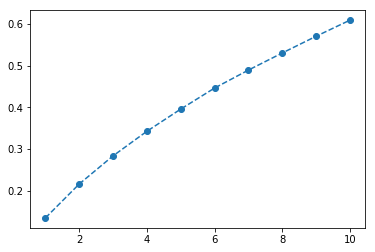

In [14]:
plt.plot(range(1,n_com+1), np.cumsum(pca.explained_variance_ratio_), linestyle='--', marker='o')

plt.show()

In [15]:
from sklearn import neighbors

for i in range(1,11):
    clf = neighbors.KNeighborsClassifier(n_neighbors = i)

    scores_knn = cross_val_score(clf, X_pca, y, cv =10)
    
    print('Cross Validations Score for KNN with n = %i, \n%s\nmean: %1.4f standard deviation: %1.4f\n' 
          % (i, str(scores_knn), np.mean(scores_knn), np.std(scores_knn)))

Cross Validations Score for KNN with n = 1, 
[ 0.625       0.475       0.5         0.55        0.5         0.65
  0.61538462  0.56410256  0.56410256  0.47368421]
mean: 0.5517 standard deviation: 0.0606

Cross Validations Score for KNN with n = 2, 
[ 0.6         0.5         0.575       0.675       0.525       0.675
  0.61538462  0.58974359  0.66666667  0.65789474]
mean: 0.6080 standard deviation: 0.0592

Cross Validations Score for KNN with n = 3, 
[ 0.6         0.575       0.575       0.7         0.475       0.6
  0.69230769  0.51282051  0.66666667  0.60526316]
mean: 0.6002 standard deviation: 0.0689

Cross Validations Score for KNN with n = 4, 
[ 0.65        0.55        0.525       0.625       0.55        0.675
  0.61538462  0.51282051  0.61538462  0.60526316]
mean: 0.5924 standard deviation: 0.0519

Cross Validations Score for KNN with n = 5, 
[ 0.675       0.55        0.5         0.65        0.55        0.7
  0.58974359  0.51282051  0.61538462  0.57894737]
mean: 0.5922 standard devi

In [16]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
scores_gnb = cross_val_score(gnb, X_pca, y, cv = 10)

print('Cross Validation Scores for Gaussian Naive Bayes: \n%s\nmean: %1.4f standard deviation: %1.4f\n'\
      % (str(scores_gnb), np.mean(scores_gnb), np.std(scores_gnb)))

Cross Validation Scores for Gaussian Naive Bayes: 
[ 0.65        0.575       0.675       0.75        0.55        0.675
  0.56410256  0.46153846  0.61538462  0.63157895]
mean: 0.6148 standard deviation: 0.0767



In [17]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

qda = QDA()

scores_qda = cross_val_score(qda, X_pca, y, cv =10)

print('Cross Validation Scores for Quadratic Discriminant Analysis:\n%s\nmean: %1.4f standard deviation: %1.4f\n'\
      % (str(scores_qda), np.mean(scores_qda), np.std(scores_qda)))

Cross Validation Scores for Quadratic Discriminant Analysis:
[ 0.625       0.575       0.7         0.75        0.5         0.675
  0.58974359  0.48717949  0.66666667  0.52631579]
mean: 0.6095 standard deviation: 0.0844



In [18]:
from sklearn import tree

clf_tree = tree.DecisionTreeClassifier(max_depth = 5)

scores_tree = cross_val_score(clf_tree, X_pca, y, cv =10)

print('Cross Validation Scores for Decision Tree Classifier:\n%s\nmean: %1.4f standard deviation: %1.4f\n'\
      % (str(scores_tree), np.mean(scores_tree), np.std(scores_tree)))

Cross Validation Scores for Decision Tree Classifier:
[ 0.5         0.575       0.675       0.45        0.575       0.65
  0.53846154  0.43589744  0.58974359  0.55263158]
mean: 0.5542 standard deviation: 0.0734



In [19]:
from sklearn.ensemble import RandomForestClassifier

for trees in range(1,11):
    for depth in range(1,5):
        clf_rf = RandomForestClassifier(n_estimators = trees, max_depth = depth)
        scores_forest = cross_val_score(clf_rf, X_pca, y, cv =10)
        print('Cross Validation Scores for Random Forest with trees = %i and depth = %i:\nmean: %1.4f \
        standard deviation: %1.4f \n' % (trees, depth, np.mean(scores_forest), np.std(scores_forest)))

Cross Validation Scores for Random Forest with trees = 1 and depth = 1:
mean: 0.5218         standard deviation: 0.0547 

Cross Validation Scores for Random Forest with trees = 1 and depth = 2:
mean: 0.5444         standard deviation: 0.0579 

Cross Validation Scores for Random Forest with trees = 1 and depth = 3:
mean: 0.5795         standard deviation: 0.0783 

Cross Validation Scores for Random Forest with trees = 1 and depth = 4:
mean: 0.5540         standard deviation: 0.0840 

Cross Validation Scores for Random Forest with trees = 2 and depth = 1:
mean: 0.5619         standard deviation: 0.0755 

Cross Validation Scores for Random Forest with trees = 2 and depth = 2:
mean: 0.6278         standard deviation: 0.0708 

Cross Validation Scores for Random Forest with trees = 2 and depth = 3:
mean: 0.5570         standard deviation: 0.0766 

Cross Validation Scores for Random Forest with trees = 2 and depth = 4:
mean: 0.5492         standard deviation: 0.0469 

Cross Validation Scores 

In [20]:
from sklearn.svm import SVC

for i in range(1,51,5):
    clf = SVC(kernel='linear')
    scores_svm = cross_val_score(clf, X_pca, y, cv =10)
    print('Cross Validation Scores for SVM with RBF Kernel:\n%s\nmean: %1.4f standard deviation: %1.4f\n'\
      % (str(scores_svm), np.mean(scores_svm), np.std(scores_svm)))

Cross Validation Scores for SVM with RBF Kernel:
[ 0.725       0.575       0.725       0.775       0.5         0.8
  0.58974359  0.48717949  0.71794872  0.65789474]
mean: 0.6553 standard deviation: 0.1059

Cross Validation Scores for SVM with RBF Kernel:
[ 0.725       0.575       0.725       0.775       0.5         0.8
  0.58974359  0.48717949  0.71794872  0.65789474]
mean: 0.6553 standard deviation: 0.1059

Cross Validation Scores for SVM with RBF Kernel:
[ 0.725       0.575       0.725       0.775       0.5         0.8
  0.58974359  0.48717949  0.71794872  0.65789474]
mean: 0.6553 standard deviation: 0.1059

Cross Validation Scores for SVM with RBF Kernel:
[ 0.725       0.575       0.725       0.775       0.5         0.8
  0.58974359  0.48717949  0.71794872  0.65789474]
mean: 0.6553 standard deviation: 0.1059

Cross Validation Scores for SVM with RBF Kernel:
[ 0.725       0.575       0.725       0.775       0.5         0.8
  0.58974359  0.48717949  0.71794872  0.65789474]
mean: 0.655

In [21]:
from sklearn.svm import SVC

for i in range(1,51,5):
    clf = SVC(kernel='rbf', gamma = i)
    scores_svm = cross_val_score(clf, X_pca, y, cv =10)
    print('Cross Validation Scores for SVM with RBF Kernel:\n%s\nmean: %1.4f standard deviation: %1.4f\n'\
      % (str(scores_svm), np.mean(scores_svm), np.std(scores_svm)))

Cross Validation Scores for SVM with RBF Kernel:
[ 0.525       0.55        0.525       0.6         0.575       0.55
  0.56410256  0.53846154  0.56410256  0.55263158]
mean: 0.5544 standard deviation: 0.0217

Cross Validation Scores for SVM with RBF Kernel:
[ 0.55        0.55        0.55        0.55        0.55        0.55
  0.53846154  0.53846154  0.53846154  0.55263158]
mean: 0.5468 standard deviation: 0.0055

Cross Validation Scores for SVM with RBF Kernel:
[ 0.55        0.55        0.55        0.55        0.55        0.55
  0.53846154  0.53846154  0.53846154  0.55263158]
mean: 0.5468 standard deviation: 0.0055

Cross Validation Scores for SVM with RBF Kernel:
[ 0.55        0.55        0.55        0.55        0.55        0.55
  0.53846154  0.53846154  0.53846154  0.55263158]
mean: 0.5468 standard deviation: 0.0055

Cross Validation Scores for SVM with RBF Kernel:
[ 0.55        0.55        0.55        0.55        0.55        0.55
  0.53846154  0.53846154  0.53846154  0.55263158]
mean: 